In [1]:
import fileinput, sys
import urllib.request
import webbrowser
import subprocess

In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [2]:
# change makefile to have GPU and OPENCV enabled
os.chdir('C:/Users/zmfkv/바탕 화면/darknet') # Change Path
for line in fileinput.input('./Makefile', inplace=True):
    if 'GPU' in line:
        line = line.replace(line, 'GPU=1\n')
    elif 'OPENCV' in line:
        line = line.replace(line, 'OPENCV=1\n')
    elif 'CUDNN' in line:
        line = line.replace(line, 'CUDNN=1\n')
    elif 'CUDNN_HALF' in line:
        line = line.replace(line, 'CUDNN_HALF=1\n')
    sys.stdout.write(line)

In [3]:
# verify CUDA
print(os.popen('nvcc -V').read())
print(os.popen('nvidia-smi').read())

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Wed_Oct_23_19:32:27_Pacific_Daylight_Time_2019
Cuda compilation tools, release 10.2, V10.2.89

Wed Mar  3 21:44:28 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 461.72       Driver Version: 461.72       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 1050   WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   31C    P8    N/A /  N/A |    284MiB /  2048MiB |     15%      Default |
|                               |                      |       

In [4]:
# import make
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
# !make
# make

# Step 3: Download pre-trained YOLOv4 weights
YOLOv4 has been trained already on the coco dataset which has 80 classes that it can predict. We will grab these pretrained weights so that we can run YOLOv4 on these pretrained classes and get detections.

In [56]:
webbrowser.open('https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights')

True

# Step 4: Define Helper Functions

These three functions are helper functions that will allow you to show the image in your Colab Notebook after running your detections, as well as upload and download images to and from your Cloud VM.

In [5]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

# Step 5: Run Your Detections with Darknet and YOLOv4!
Darknet is now built and ready to run detections using YOLOv4 in the cloud! You can find out which sorts of classes the pre-trained YOLOv4 weights can detect by clicking here. [COCO CLASSES](http://cocodataset.org/#explore)

The object detector can be run using the following command
```bash
!./darknet detector test <path to .data file> <path to config> <path to weights> <path to image>
```
Darknet comes with a few images already installed in the darknet/data/ folder.

**Note:** After running detections OpenCV can't open the image instantly in the cloud so we must run: 
```bash
imShow('predictions.jpg')
```
This will output the image with the detections shown. The most recent detections are always saved to 'predictions.jpg'

Try out the examples below for yourself!

In [6]:
aa = os.getcwd()
aa = aa.replace('\\','/')
print(aa)

C:/Users/zmfkv/바탕 화면/darknet


In [10]:
os.system('cd {}'.format(os.getcwd()))
output = os.popen('{0} detector test {0}/cfg/coco.data {0}/cfg/yolov4.cfg yolov4.weights {0}/data/person.jpg'.format(aa))
print(output)


In [37]:
subprocess.getoutput('../darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg')
# os.system('start')

"'..'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는\n배치 파일이 아닙니다."

In [27]:
subprocess.getstatusoutput('ipconfig')


(0,
 '\nWindows IP 구성\n\n\n이더넷 어댑터 이더넷:\n\n   연결별 DNS 접미사. . . . : kornet\n   링크-로컬 IPv6 주소 . . . . : fe80::74e3:ab87:ed65:80e8%13\n   IPv4 주소 . . . . . . . . . : 14.40.66.168\n   서브넷 마스크 . . . . . . . : 255.255.255.0\n   기본 게이트웨이 . . . . . . : 14.40.66.254\n\n무선 LAN 어댑터 로컬 영역 연결* 1:\n\n   미디어 상태 . . . . . . . . : 미디어 연결 끊김\n   연결별 DNS 접미사. . . . : \n\n무선 LAN 어댑터 로컬 영역 연결* 10:\n\n   미디어 상태 . . . . . . . . : 미디어 연결 끊김\n   연결별 DNS 접미사. . . . : \n\n무선 LAN 어댑터 Wi-Fi:\n\n   미디어 상태 . . . . . . . . : 미디어 연결 끊김\n   연결별 DNS 접미사. . . . : ')

In [15]:
# dis = subprocess.call('{0} detector test {0}/cfg/coco.data {0}/cfg/yolov4.cfg yolov4.weights {0}/data/person.jpg'.format(aa))
dis = subprocess.call(dir)
print(dis)

TypeError: 'builtin_function_or_method' object is not iterable

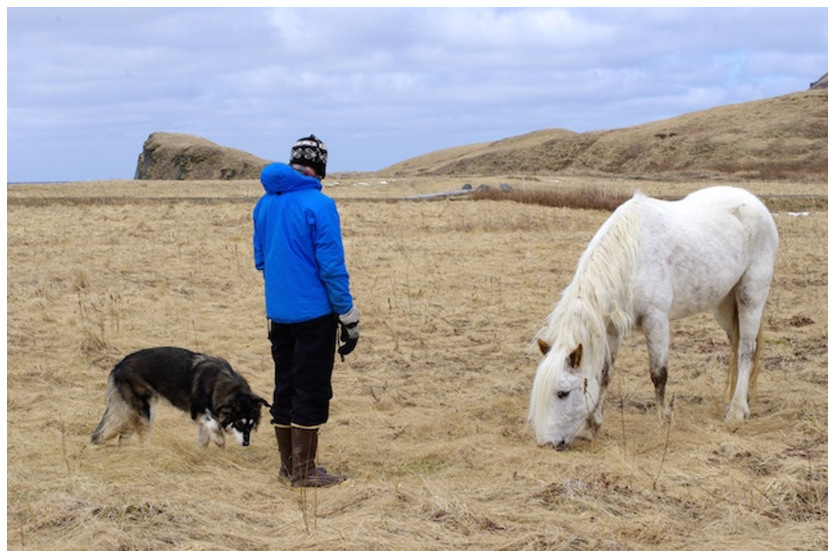

In [36]:
# show image using our helper function
imShow('predictions.jpg')

In [35]:
# This stops 'Run all' at this cell by causing an error
assert False

AssertionError: 

# Step 6: Uploading Local or Google Drive Files to Use
You may want to run detections on more than just the images within the darknet/data/ folder. This step will show you how to upload local or Google Drive files to the cloud VM and run detections on them!

### Method 1: Local Files
To upload local files just use our helper function by running 'upload()' as seen below. Click **Choose Files** and select the image from your local machine that you want to upload to the cloud VM.

If this function doesn't work for you then click the **Upload** button in the File Explorer on the left side of your notebook.
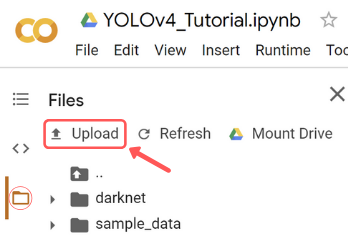

The image should save to the root directory of the cloud VM so that you can access it from the darknet command by running.
```
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights ../<your image name>
```

In [0]:
# try out the upload helper function! (I uploaded an image called highway.jpg, upload whatever you want!)
%cd ..
upload()
%cd darknet

In [0]:
# run darknet with YOLOv4 on your personal image! (note yours will not be called highway.jpg so change the name)
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights ../highway.jpg
imShow('predictions.jpg')

### Method 2: Google Drive
Images can also be uploaded from your Google Drive and easily have YOLOv4 detections run on them.

You will want to run the below cell to mount your google drive into the cloud VM so that you can access its contents. It is that easy!

**NOTE:** We will be creating a symbolic link between '/content/gdrive/My\ Drive/' and '/mydrive.

This means we are just creating a shortcut '/mydrive' to map to the contents within the folder '/content/gdrive/My\ Drive/'.

The reason for this is that sometime having the space in 'My Drive' folder path can cause issues when running certain commands. This symbolic link will stop this from happening!

Now you can run YOLOv4 with images from Google Drive using the darknet command:
```
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights /mydrive/<path to image>
```
I recommend saving images within a folder called 'images' at the root level of your Google Drive.

In [0]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [0]:
# cd back into the darknet folder to run detections
%cd darknet

In [0]:
# run detections on image within your Google Drive!
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights /mydrive/images/street.jpg
imShow('predictions.jpg')

### Download Files to Local Machine or Google Drive from Cloud VM
You can also easily download images from your cloud VM to save to your local machine or Google Drive. 

#### Method 1: Local Machine

You can do it easily by using our helper function 'download()' or by right clicking the image in the File Explorer on the left side of your notebook and hitting **Download**. Files will be saved to your *Downloads* folder.

This is useful if you want to download the **'predictions.jpg'** images that the object detector outputs. 

#### Method 2: Google Drive
A simple copy command can copy over any file to your Google Drive as it is already mounted. (you must run the mount command above if you have not already)

```
!cp <file to download> <destination to save file>
```
See example of each below!

In [0]:
# LOCAL MACHINE DOWNLOAD
# if you get an error first run then run it again and it should work
download('predictions.jpg')

In [0]:
# GOOGLE DRIVE DOWNLOAD
# note that I can change what the image name is saved as (I am saving it as detection1.jpg)
!cp predictions.jpg /mydrive/images/detection1.jpg

# Step 7: Running YOLOv4 on Video in the Cloud!

You can also run YOLOv4 object detections on video in your Google Colab VM. Follow the cells below to see how to run videos from your local machine or from your Google Drive! 

## Local Machine Video
Here is how to upload video from local machine, run detector and then download video showing detections.

In [0]:
# upload the video of your choosing! (Feel free to use the same video I do, it is in the Github repository)
upload()

In [0]:
!./darknet detector demo cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show test.mp4 -i 0 -out_filename results.avi

In [0]:
# download the video with detections shown
download('results.avi')

## Google Drive Video
Here is how to run detector on video stored in Google Drive and save video straight to Google drive as well!

**Note:** You will have to change the paths to where your video is stored within your Google Drive and to where you want the resulting video stored. I have a videos folder in the home directory of my Google Drive.

In [0]:
!./darknet detector demo cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show /mydrive/videos/test.mp4 -i 0 -out_filename /mydrive/videos/results.avi

# Step 8: Customize YOLOv4 with the different command line flags.
Darknet and YOLOv4 have a lot of command line flags you can add to your '!./darknet detector ...' to allow it to be customizeable and flexible.

I will show a few examples of these flags that you can take advantage of! Feel free to mix and match them together to customize your detections in any way you want.

## Threshold Flag
There is a flag '-thresh' you can use to add a threshold for confidences on the detections.  Only detections with a confidence level above the threshold you set will be returned.

In the example below we run darknet with YOLOv4 without a threshold on the test image dog.jpg. The image returns four detections, the lowest confidence being on the pottedplant with 33%.

If we add the '-thresh 0.5' flag this will only output three detections as now pottedplant falls below the threshold and is ignored. 

Check it out below!

In [0]:
# this is ran without the threshold flag set
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/dog.jpg
imShow('predictions.jpg')

In [0]:
# same detections but ran with the threshold flag set to 0.5 (pottedplant is no longer detected!)
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/dog.jpg -thresh 0.5
imShow('predictions.jpg')

## Output Bounding Box Coordinates
You can output bounding box coordinates for each detection with the flag '-ext_output'. This external outputs flag will give you a few extra details about each detection within an image.

Check it out below!

In [0]:
# darknet run with external output flag to print bounding box coordinates
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg -ext_output
imShow('predictions.jpg')

## Don't Show Image
You can add the flag '-dont_show' to not have the image outputted after running darknet. This doesn't really affect anything when running in Colab as the image is unable to output properly straight from darknet anyways. However, by adding the -dont_show flag you will get rid of the following warning from showing.
```
Unable to init server: Could not connect: Connection refused

(predictions:1850): Gtk-WARNING **: 17:01:00.687: cannot open display:
```

This is an important flag to have when running darknet with YOLOv4 on video as it will suppress having the video shown.

In [0]:
# running darknet with dont show flag set (no longer get warnings)
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg -dont_show

# Step 9: Multiple Images at Once
YOLOv4 object detections can be run on multiple images at once. This is done through having a text file which has the paths to several images that you want to have the detector run on.

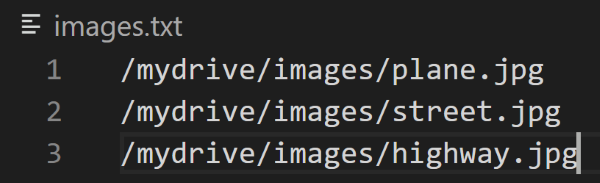

The .txt file should be in this format. One path to an image per line.

This file is stored to my Google Drive root directory and holds the path to three images within my Google Drive images folder.




## Save Results to .JSON File
Here is an example of saving the multiple image detections to a .JSON file.

In [0]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights -ext_output -dont_show -out result.json < /mydrive/images.txt

In [0]:
download('result.json')

## Saving Results to a .txt File
You can also save the results of running multiple images to a text file.

In [0]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show -ext_output < /mydrive/images.txt > result.txt

In [0]:
download('result.txt')

# COMING SOON: HOW TO TRAIN YOUR OWN YOLOv4 CUSTOM OBJECT DETECTOR 

I am currently working on a video showing how to train your very own custom YOLOv4 object detector! So check back to my channel or repository soon. (May already be up by the time you are watching/reading this!)